#### HW8

In [133]:
using LinearAlgebra, PyPlot

#### Problem 1

In [134]:
function cubic_spline(x,y)
    h = (x[2:length(x)] .- x[1:(length(x)-1)])
    dl = copy(h)
    dl[end] = 0.0
    d = zeros(length(x))
    d[1] = d[end] = 1
    d[2:(end-1)] = 2*(h[1:end-1] .+ h[2:end])
    du = zeros(length(x)-1)
    du[2:end] = h[2:end]
    A = Tridiagonal(convert.(Float64,dl),convert.(Float64,d),convert.(Float64,du))
    f = zeros(length(y))
    new_y = y[2:end] .- y[1:(end-1)]
    f[2:(end-1)] = (3*(new_y[2:end]) ./ h[1:(end-1)]) .- (3*(new_y[1:(end-1)]) ./ h[2:end])
    c = A\f
    b = @. new_y/h - h*(2*c[1:(end-1)]+c[2:end])/3
    d = @. (c[2:end] - c[1:(end-1)])/(3*h)
    return b,c,d
end

cubic_spline (generic function with 1 method)

#### Problem 1(b)

In [135]:
function spline_eval(x,y,b,c,d,xx)
    yy = zeros(length(xx))
    for i in 1:(length(yy))
        for j in 1:(length(x)-1)
            if (xx[i]<=x[j+1])&(xx[i]>=x[j])
                yy[i] = y[j] + b[j]*(xx[i]-x[j])+c[j]*(xx[i]-x[j])^2 + d[j]*(xx[i]-x[j])^3
                break
            end
        end
    end
    return yy
end


spline_eval (generic function with 1 method)

#### Problem 1(c)

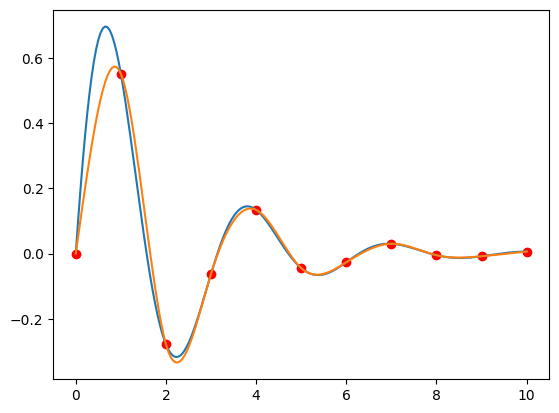

PyObject <matplotlib.collections.PathCollection object at 0x7f3e6f7aab90>

In [136]:
f(x) = exp(-x/2)*sin(2*x)
xx = collect(range(0, stop=10, length=200))
plot(xx, f.(xx))
x = collect(0:1:10)
y = collect(f.(x))
b,c,d = cubic_spline(x,y)
yy = spline_eval(x,y,b,c,d,xx)
plot(xx,yy)
scatter(x,y,color = "red")

#### Problem 2(a)

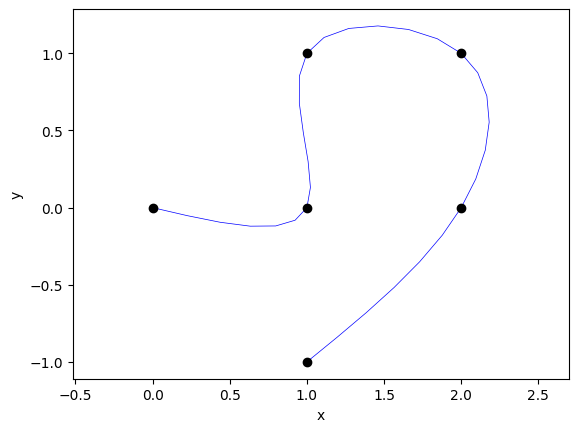

In [137]:
function plot_parametric_spline(x,y; r = 10)
    t =  collect(0:length(x)-1)
    tt = (collect(range(0, stop=(length(x)-1), length=3*r+1)))
    #we will do the interpolation on both x and y
    b1,c1,d1 = cubic_spline(t,x)
    b2,c2,d2 = cubic_spline(t,y)
    xx = spline_eval(t,x,b1,c1,d1,tt)
    yy = spline_eval(t,y,b2,c2,d2,tt)
    #println(xx)
    #println(yy)
    plot(xx,yy,linewidth = 0.5,color = "blue")
    axis("equal")
    xlabel("x")
    ylabel("y")
end
xy = [0 0; 1 0; 1 1; 2 1; 2 0; 1 -1]
plot_parametric_spline(xy[:,1], xy[:,2])
plot(xy[:,1], xy[:,2], "ko");

#### Problem 2(b)

In [138]:
function read_splines(fname)
    file = open(fname)
    d = []
    num = 0
    while !eof(file)
        str = readline(file)
        if occursin(r"^\d*$", str)
            num = parse(Int64, str)
        else
            d_nk = reshape([],0,2)
            data = parse.(Float64, split(str))
            d_nk = [d_nk;[data[1] data[2]]]
            for i in 1:(num-1)
                str = readline(file)
                data = parse.(Float64, split(str))
                d_nk = [d_nk;[data[1] data[2]]]
            end
            push!(d,d_nk)
        end
    end
    close(file)
    return d
end

splines = read_splines("bmw.dat")
#plot_parametric_spline(splines[1][:,1],splines[1][:,2])

909-element Vector{Any}:
 Any[11.776828 13.870221; 10.88037 18.377018; … ; 10.88037 9.363424; 11.776828 13.870221]
 Any[0.405559 3.189518; 0.483545 3.192765; … ; 1.570756 3.297869; 1.64792 3.309622]
 Any[1.987735 4.485747; 1.987735 3.706575]
 Any[0.0 3.832779; 0.157905 3.360773]
 Any[0.0 3.832779; -0.157905 3.360773]
 Any[0.157905 3.360773; 0.165069 3.341912; … ; 0.385384 3.189563; 0.405559 3.189518]
 Any[-0.405559 3.189518; -0.385384 3.189563; … ; -0.165069 3.341912; -0.157905 3.360773]
 Any[1.64792 3.309622; 1.682762 3.31665; … ; 1.986163 3.671066; 1.987735 3.706575]
 Any[-1.64792 3.309622; -1.570756 3.297869; … ; -0.483545 3.192765; -0.405559 3.189518]
 Any[-1.987735 4.485747; -1.987735 3.706575]
 Any[-1.987735 3.706575; -1.986163 3.671066; … ; -1.682762 3.31665; -1.64792 3.309622]
 Any[0.318972 9.851996; 0.318972 4.596517]
 Any[-0.318972 9.851996; -0.318972 4.596517]
 ⋮
 Any[-12.085413 28.244009; -12.080973 28.248448; … ; -12.077206 28.329476; -12.081215 28.334307]
 Any[-12.653106 

#### Problem 2(c)

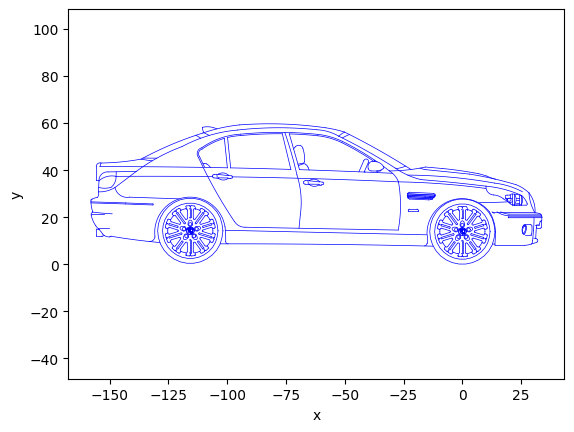

In [139]:
function plot_splines(splines)
    for s in splines
        plot_parametric_spline(s[:,1],s[:,2])
    end
end
plot_splines(splines)

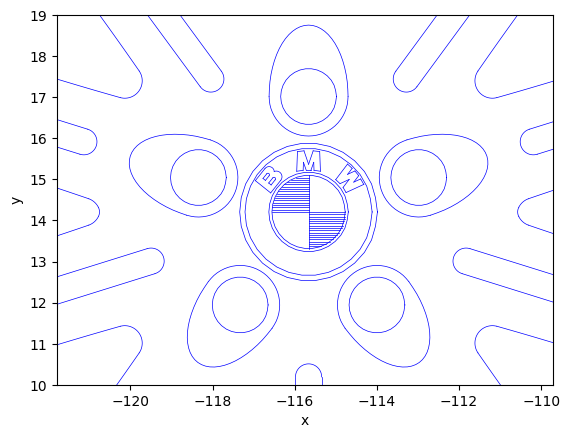

In [140]:
plot_splines(splines);
axis([-121,-110.5,10,19]);